# 3. Pixel Images

In this lab, we will show how increasing the number of pixels used to represent an image will sharpen the resolution.

In [1]:
# PACKAGE: DO NOT EDIT THIS CELL
import numpy as np
import matplotlib
import pandas as pd
matplotlib.use('Agg')
import matplotlib.pyplot as plt
matplotlib.style.use('fivethirtyeight')
from sklearn.datasets import fetch_lfw_people, fetch_olivetti_faces
import time
import timeit
%matplotlib inline
from ipywidgets import interact

<h3> 1. Alpha Values</h3>
The opacity of an image can be adjusted using an alpha value between 0 and 1.  For example, a black circle with alpha equal to .1 appears as a light gray and is black when alpha is equal to 1.  Note that a rectangular array of alpha values can then be mapped to a rectangular array of circles which have the corresponding shading.

In [2]:
xls=pd.ExcelFile('data.xlsx')
num=3 #number of images
N=8  #NxN pixels
character_collection = {}
for i in np.arange(0,num):
    character_collection[i]=pd.read_excel(xls,str(i))

In [3]:
character_collection[0]

,0,1,2,3,4,5,6,7
0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
3,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
4,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
5,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
6,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
7,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


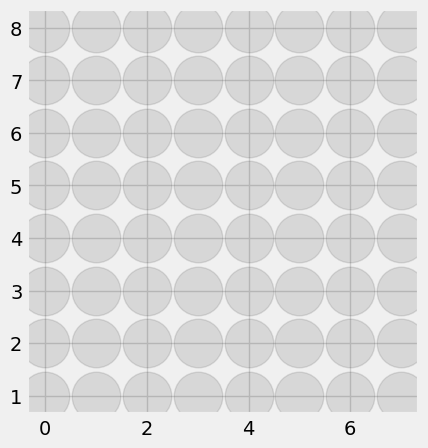

In [4]:
fig=plt.figure(figsize=(4.5,5))
for i in np.arange(0,N):
    for j in np.arange(0,N):
        plt.plot(j,8-i, marker="o", markersize=35, markeredgecolor='k', markerfacecolor="k",alpha=character_collection[0].loc[i,j])

In [5]:
character_collection[1]

,0,1,2,3,4,5,6,7
0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8
1,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8
2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8
3,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8
4,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8
5,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8
6,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8
7,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8


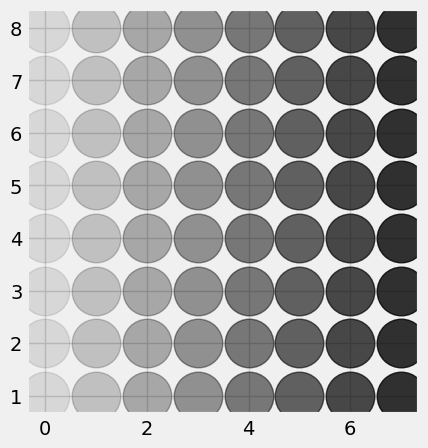

In [6]:
fig=plt.figure(figsize=(4.5,5))
for i in np.arange(0,N):
    for j in np.arange(0,N):
        plt.plot(j,8-i, marker="o", markersize=35, markeredgecolor='k', markerfacecolor="k",alpha=character_collection[1].loc[i,j])

In [7]:
character_collection[2]

,0,1,2,3,4,5,6,7
0,0.2,0.4,0.6,0.8,1,1,1,1
1,0.2,0.4,0.6,0.8,1,1,1,1
2,0.2,0.4,0.6,0.8,1,1,1,1
3,0.2,0.4,0.6,0.8,1,1,1,1
4,0.2,0.4,0.6,0.8,1,1,1,1
5,0.2,0.4,0.6,0.8,1,1,1,1
6,0.2,0.4,0.6,0.8,1,1,1,1
7,0.2,0.4,0.6,0.8,1,1,1,1


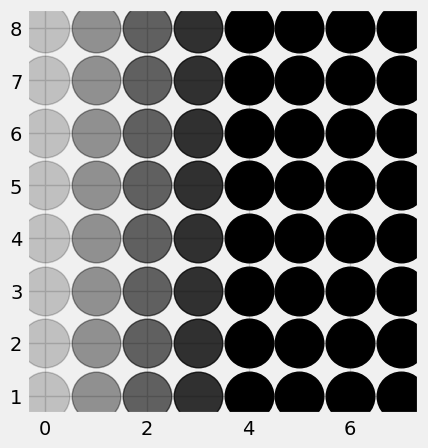

In [8]:
fig=plt.figure(figsize=(4.5,5))
for i in np.arange(0,N):
    for j in np.arange(0,N):
        plt.plot(j,8-i,marker="o", markersize=35, markeredgecolor='k', markerfacecolor="k",alpha=character_collection[2].loc[i,j])

<h3>2. Using a Function to Create Pixel Images of a Photo</h3>

We can use Python to create NxN pixel images of a given photo.  

For a given black and white picture, a computer code will create an $N\times N$ array of numbers with gray-scale values.

Or, given an $N\times N$ array of gray scale values, another computer code can reconstruct a pixel image.

First we install a library for working with pixcel images.

In [9]:
# import libraries 
import os, cv2
import numpy as np
import numpy
import pandas as pd
import matplotlib.pyplot as plt

The following function takes a picture file stored in a folder (in our case we will call the folder "images") and creates an N x N pixel image.

In [10]:
def makepixelimage(folder, N):

    directory = folder

    # A data structure called a dictionary is used to store the image data and the dataframes we'll make from them.
    imgs = {}
    dfs = {}

    # Specify the pixel image size 
    dsize = (N, N)

    # This will iterate over every image in the directory given, read it into data, and create a 
    # dataframe for it. Both the image data and its corresponding dataframe are stored.
    # Note that when being read into data, we interpret the image as grayscale. 
    pos = 0
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(f):
            imgs[pos] = cv2.imread(f, 0) # image data
            imgs[pos] = cv2.resize(imgs[pos], dsize)
            dfs[pos] = pd.DataFrame(imgs[pos]) # dataframe
            pos += 1
    return plt.imshow(imgs[0], cmap="gray")


In [11]:
i

7

First let's create an 8x8 pixel image. Can you guess the original picture?

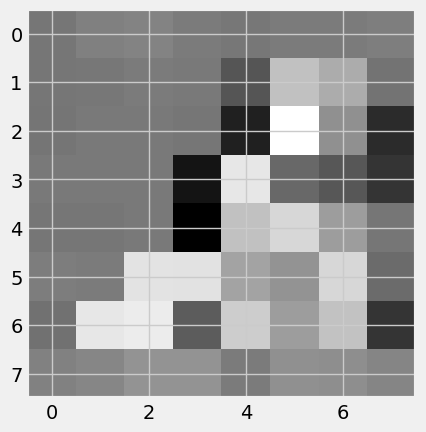

In [12]:
makepixelimage("images", 8)

<h3> Assignment</h3>

PROBLEM 1a) By increasing the number of pixels, we can get a better reproduction of the original.
Create a 16x16 pixel image.

In [13]:
# Solution to 1a)


b) Create a 32x32 pixel image.

In [14]:
# Solution to 1b)


PROBLEM  2) Upload a different image into a folder called "my_images". Then use the makepixelimage( , ) function  to create an 8x8, 16x16 and 32x32 pixel image and see if the others in the class can guess your original image.


In [15]:
#8x8 image


In [16]:
#16x16 image


In [17]:
#32x32 image


<h4> Solution </h4>

Problem 1

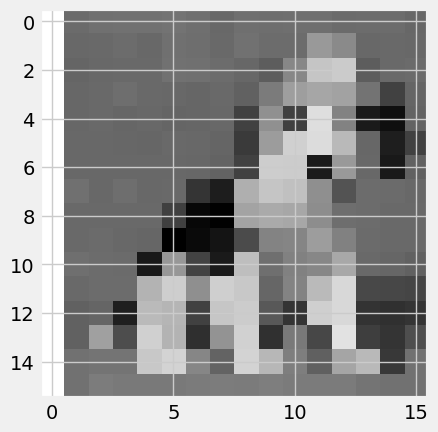

In [18]:
# Solution to 1a)
makepixelimage("images", 16) #16x16 image

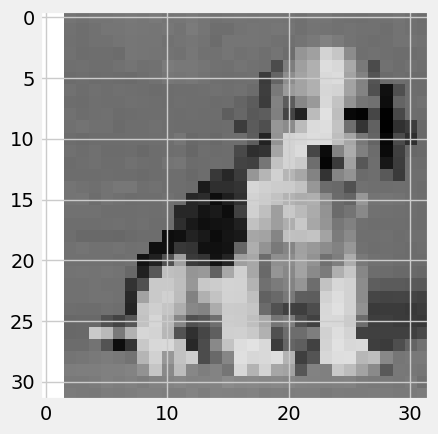

In [19]:
# Solution to 1b)
makepixelimage("images", 32) #32x32 image

Problem 2

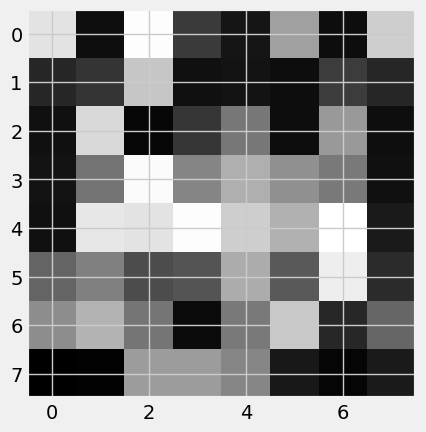

In [20]:
#8x8 image
makepixelimage("my_images", 8) #8x8 image

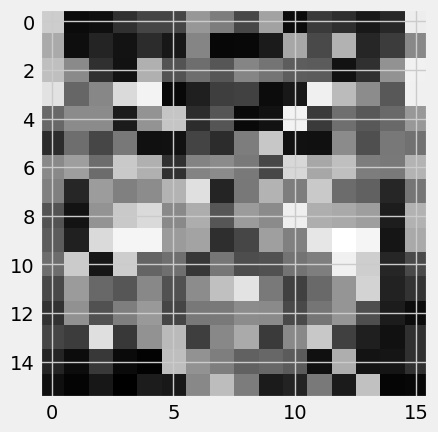

In [21]:
#16x16 image
makepixelimage("my_images", 16) #16x16 image

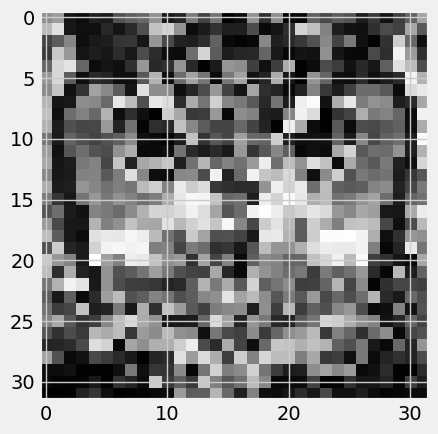

In [22]:
#32x32 image
makepixelimage("my_images", 32) #32x32 image